# Task name : Iris Flowers Classification ML Project

## Author: Parasa Sasidhar
Dataset: http://archive.ics.uci.edu/ml/datasets/Iris

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  names= ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

In [4]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.shape

(150, 5)

### To Describe Stats about Data 

In [8]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking the number of rows that belongs to each class

In [10]:
iris['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

### Data Visualization

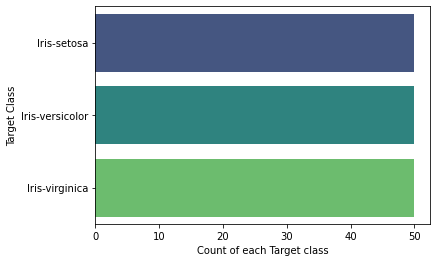

In [11]:
sns.countplot(y = 'Class', data = iris, palette="viridis")
plt.xlabel("Count of each Target class")
plt.ylabel("Target Class")
plt.show()

### Plotting multiple pairwise bivariate distributions in a dataset using pairplot

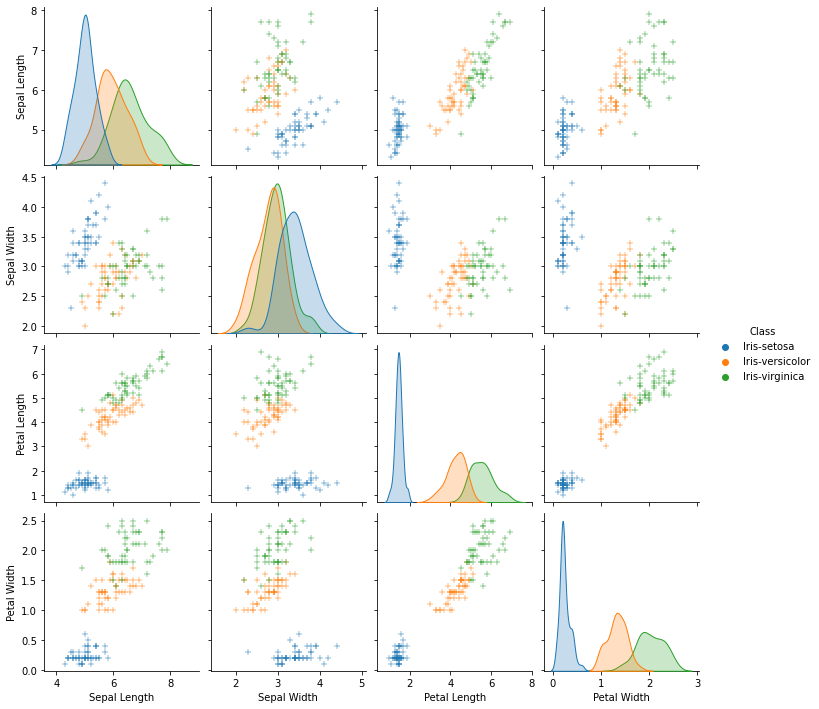

In [13]:
sns.pairplot(iris, hue='Class', markers='+')
plt.show()

It shows that Iris-Setosa is separated from both other species in all the features.

Plotting the heatmap to check the correlation. dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

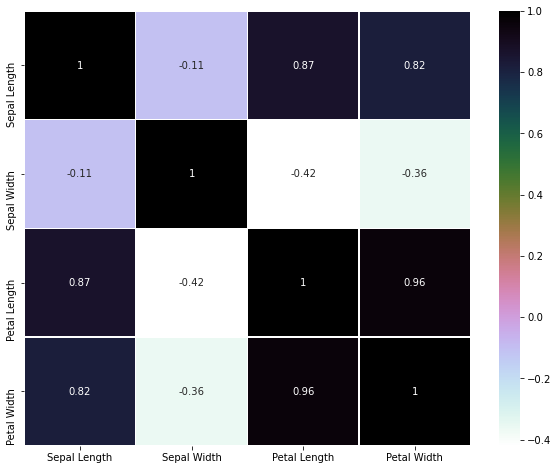

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r', linewidths=0.4)
plt.show()

### Model Building
splitting the Dataset

In [16]:
X = iris.drop(['Class'], axis=1)
y = iris['Class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.33)

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction and Performance Metric

In [21]:
knn_predict = knn_model.predict(X_test)

### Fitting method of the knn object

In [28]:
print(f"""
KNN Accuracy: {accuracy_score(y_test, knn_predict)}
""")


KNN Accuracy: 0.98



In [29]:
print(f"""
KNN Confusion Matrix: 
{confusion_matrix(y_test, knn_predict)},
""")


KNN Confusion Matrix: 
[[17  0  0]
 [ 0 16  1]
 [ 0  0 16]],



In [30]:
print(f"""
KNN Classification Report: 
{classification_report(y_test, knn_predict)},
""")


KNN Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50
,

